# Testing entire signal filtering (low pass)

In [35]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

,x,y
0,0.000,-1523.028
1,0.001,-1521.964
2,0.002,-1522.187
3,0.003,-1523.776
4,0.004,-1524.941
...,...,...
3000,3.000,-1523.343
3001,3.001,NaN
3002,3.002,NaN
3003,3.003,NaN


,x,y
0,0.000,-1523.028
1,0.001,-1521.964
2,0.002,-1522.187
3,0.003,-1523.776
4,0.004,-1524.941
...,...,...
2996,2.996,-1523.701
2997,2.997,-1525.608
2998,2.998,-1526.786
2999,2.999,-1525.398


<Axes: xlabel='x'>

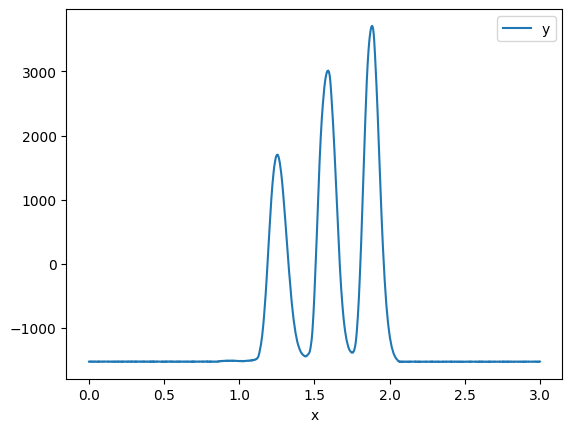

In [36]:
df = pd.read_csv("../data/_tests_data.csv", delimiter=',')
# df
df = df[['T[s]', "lc1/test-0"]]
df.rename(columns={'T[s]': 'x', 'lc1/test-0': 'y'}, inplace=True)
# df
# Remove rows at the end which may have no value if the test is shorter than the others.
df.dropna(inplace=True)
# df
df.plot('x', 'y')



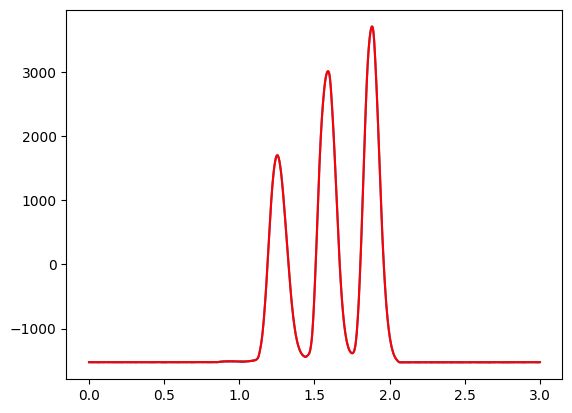

In [45]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()
order= 2
fcut = 50
sos = signal.butter(order, fcut, 'low', fs=1000, output='sos')
# sos
# y
y2 = signal.sosfiltfilt(sos, y)
# y2
plt.plot(x,y) 
plt.plot(x,y2, color='red') 
# plt.show()


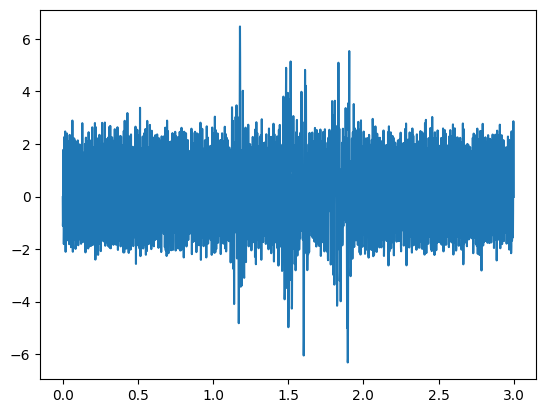

In [46]:
# Plot error (filtered - original)
plt.plot(x, y2 - y)